In [75]:
# Store url
url = 'https://www.gutenberg.org/files/10/10-h/10-h.htm'

In [76]:
import requests

In [77]:
#make the request to the url
req=requests.get(url)
type(req)

requests.models.Response

In [78]:
# Extract HTML from Response object
html = req.text
#print(html)

In [79]:
# Import BeautifulSoup from bs4
from bs4 import BeautifulSoup

In [80]:
soup = BeautifulSoup(html, "html5lib")

In [81]:
type(soup)

bs4.BeautifulSoup

In [82]:
# Get the text out of the soup
text = soup.get_text()
# print(text)#the text contains complete novel..no more html tags, they're excluded now

In [83]:
import re

In [84]:
tokens=re.findall('\w+', text)

In [85]:
#Now, we're having tokens(words) in tokens list
#Now let's try with nltk
from nltk.tokenize import RegexpTokenizer

# Create tokenizer
tokenizer = RegexpTokenizer('\w+')



# Create tokens
tokens = tokenizer.tokenize(text)

In [86]:
#Making all the words lower
# Initialize new list
words = []


# Loop through list tokens and make lower case
for word in tokens:
    words.append(word.lower())




In [87]:
#Removing the stop words like 'a', 'the','you' and etc.
# Import nltk
import nltk

# Get English stopwords and print some of them
sw = nltk.corpus.stopwords.words('english')
# Initialize new list
words_new = []

# Add to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw:
        words_new.append(word)

# Print several list items as sanity check
words_new[:5]

['project', 'gutenberg', 'ebook', 'old', 'testament']

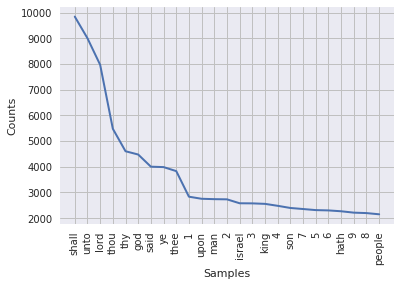

In [88]:
#Plotting sample frequency
#Import datavis libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Create freq dist and plot
freqdist1 = nltk.FreqDist(words_new)
freqdist1.plot(25)
# import  nltk.probability.ProbDistI
# nltk.freqdists(words_new)

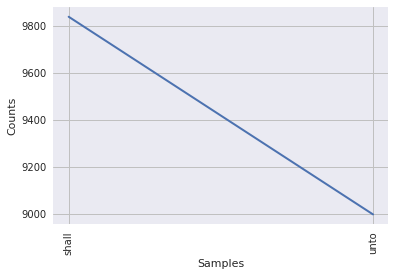

In [89]:
#Add more stopwords
# Import stopwords from sklearn
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

# Add sklearn stopwords to words_sw
sw = set(sw + list(ENGLISH_STOP_WORDS))

# Initialize new list
words_ns = []


# Add to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw:
        words_ns.append(word)


# Create freq dist and plot
freqdist2 = nltk.FreqDist(words_ns)
freqdist2.plot(2)